In [169]:
import numpy as np
from math import cos, pi, sqrt
import matplotlib.pyplot as plt
from PIL import Image

In [170]:
imgArray = np.array([ [16,  11,  10,  16,  24,  40,  51,  61],
                    [12,  12,  14,  19,  26,  58,  60,  55],
                    [14,  13,  16,  24,  40,  57,  69,  56],
                    [14,  17,  22,  29,  51,  87,  80,  62],
                    [18,  22,  37,  56,  68, 109, 103,  77],
                    [24,  35,  55,  64,  81, 104, 113,  92],
                    [49,  64,  78,  87, 103, 121, 120, 101],
                    [72,  92,  95,  98, 112, 100, 103,  99] ])

In [171]:
def DCT_process(matrix, i, j)->float:
    height, width = matrix.shape
    value = 0
    
    for col in range(height):
        for row in range(width):
            save = matrix[col,row]
            save *= cos(pi * (2*col+1) * i / (2.*height))
            save *= cos(pi * (2*row+1) * j / (2.*width))
            value += save
    c = 1
    if i == 0: c /= sqrt(2)
    if j == 0: c /= sqrt(2)

    return (2. / sqrt(height * width)) * c * value

def DCT(matrix)->float:
    height, width = matrix.shape
    dct = np.zeros_like(matrix).astype(float)

    for col in range(height):
        for row in range(width):
            dct[col, row] = DCT_process(matrix, col, row)
            
    return dct


In [172]:
def IDCT_process(dct, i, j)->float:
    height, width = dct.shape
    value = 0

    for col in range(height):
        for row in range(width):
            save = dct[col, row]
            if col == 0: save /= sqrt(2)
            if row == 0: save /= sqrt(2)

            save *= cos(pi * (2*i+1) * col / (2.*height))
            save *= cos(pi * (2*j+1) * row / (2.*width))
            value += save
    
    return (2. / sqrt(height*width)) * value


def IDCT(dct)->float:
    height, width = dct.shape
    matrix = np.zeros_like(dct).astype(float)

    for col in range(height):
        for row in range(width):
            matrix[col, row] = IDCT_process(dct, col, row)

    return matrix

In [173]:
def RMSE(array1:np.ndarray, array2:np.ndarray):
    return sqrt(np.mean((array1-array2)**2))

matrix_dct = DCT(imgArray)
matrix_idct = IDCT(matrix_dct)
print('Loss = %f'%RMSE(imgArray, matrix_idct))
print(imgArray)
print('\n')
print(matrix_dct)
print('\n')
print(matrix_idct)

Loss = 0.000000
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]


[[ 4.61000000e+02 -1.68360713e+02 -1.49830296e+01  3.00003677e+01
  -3.10000000e+01  8.86180477e+00  1.06481113e+00 -2.59644590e+00]
 [-1.94429190e+02 -1.81503392e+00  3.82910959e+01  4.75835106e+00
   6.56842027e+00  3.91244792e+00  5.81915341e+00 -5.84319007e+00]
 [ 3.24246554e+01  4.35581181e+01  1.05585047e+01 -2.22948525e+01
   1.54642002e+01 -1.08418427e+01 -5.53033009e+00  4.49921782e+00]
 [-2.61581186e+00 -2.78610569e+01 -1.01537314e+00 -4.12800097e-01
  -2.85250260e+00  7.37082368e+00  4.33235360e+00 -3.03983774e+00]
 [ 2.00000000e+00  1.13192702e+01  7.09324174e-01  1.47173664e+00
   4.50000000e+00 -4.72939344e+00  1.05917856e+00 -2.59151517e+00]
 [-6.98382951e-01 -3.53858939e+00  2

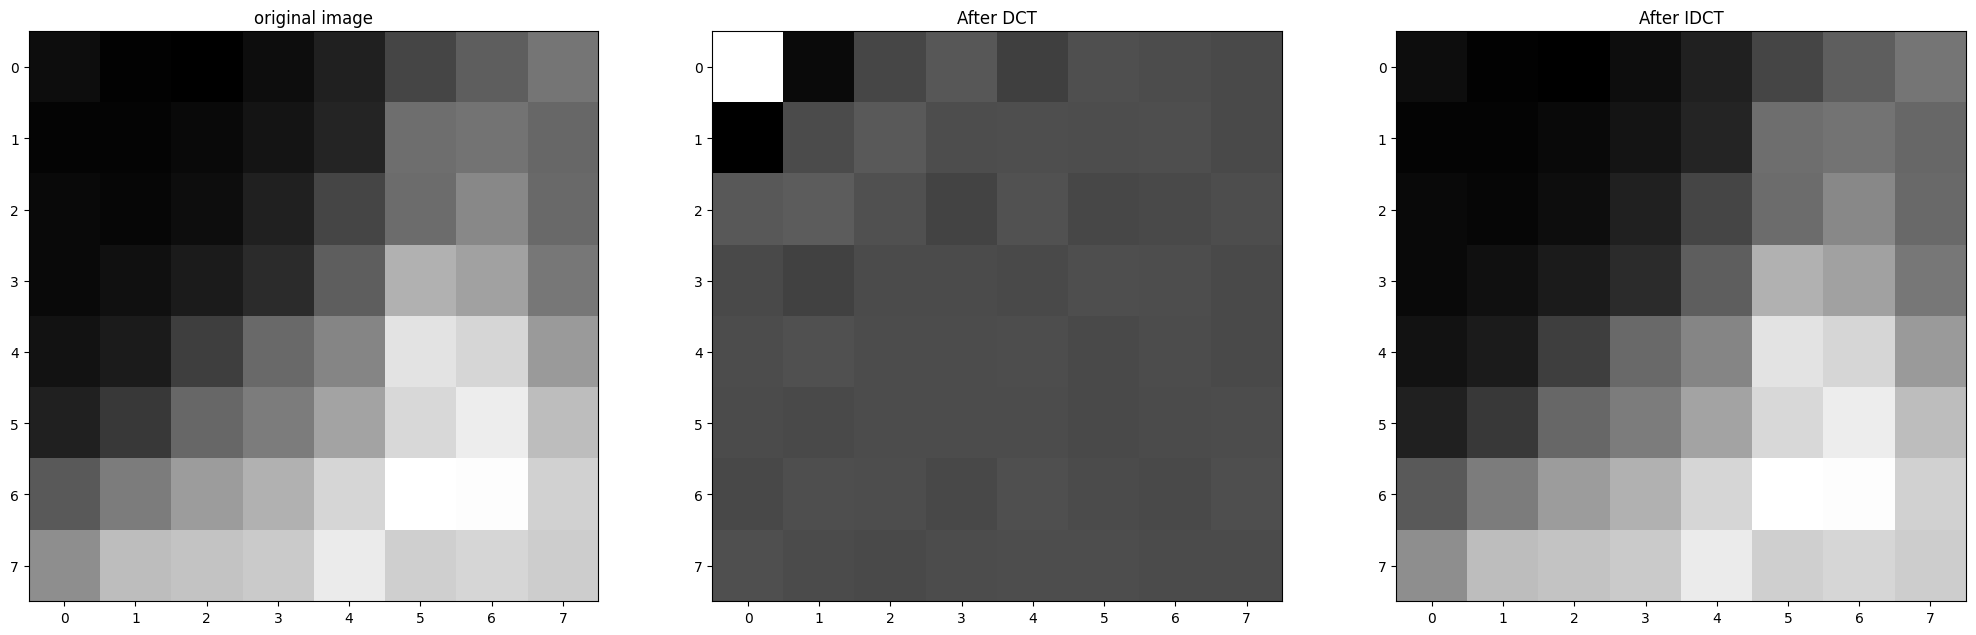

In [174]:
fig = plt.figure(figsize=[25,25])
fig.add_subplot(1,3,1)
plt.title('original image')
plt.imshow(imgArray, cmap='gist_gray')
fig.add_subplot(1,3,2)
plt.title('After DCT')
plt.imshow(matrix_dct, cmap='gist_gray')
fig.add_subplot(1,3,3)
plt.title('After IDCT')
plt.imshow(matrix_idct, cmap='gist_gray')